In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("covid19c.csv")

data
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths
0,8/28/2020,Abruzzo,Italy,4/2/2021 15:13,3725,472
1,8/28/2020,Acre,Brazil,4/2/2021 15:13,24462,608
2,8/28/2020,Adygea Republic,Russia,4/2/2021 15:13,3327,27
3,8/28/2020,Aguascalientes,Mexico,4/2/2021 15:13,5471,398
4,8/28/2020,Aichi,Japan,4/2/2021 15:13,4417,61
...,...,...,...,...,...,...
562,8/28/2020,Zaporizhia Oblast,Ukraine,4/2/2021 15:13,1487,25
563,8/28/2020,Zeeland,Netherlands,4/2/2021 15:13,1036,72
564,8/28/2020,Zhejiang,Mainland China,4/2/2021 15:13,1277,1
565,8/28/2020,Zhytomyr Oblast,Ukraine,4/2/2021 15:13,3063,61


In [5]:
X = data.iloc[:, [4, 5]].values
X

array([[ 3725,   472],
       [24462,   608],
       [ 3327,    27],
       ...,
       [ 1277,     1],
       [ 3063,    61],
       [18636,  1343]], dtype=int64)

In [6]:
numeric_data =  pd.read_csv("covid19c.csv")
numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_data.dropna(inplace=True)
del numeric_data['ObservationDate']
del numeric_data['Province/State']
del numeric_data['Country/Region']
del numeric_data['Last Update']


numeric_data

,Confirmed,Deaths
0,3725,472
1,24462,608
2,3327,27
3,5471,398
4,4417,61
...,...,...
562,1487,25
563,1036,72
564,1277,1
565,3063,61


In [7]:
scaler = StandardScaler()
scaler.fit(numeric_data)
scaler.transform(numeric_data)

array([[-0.34262166, -0.20651099],
       [-0.09757444, -0.16531063],
       [-0.34732479, -0.341321  ],
       ...,
       [-0.37154945, -0.34919754],
       [-0.35044446, -0.33102091],
       [-0.16641975,  0.05735309]])

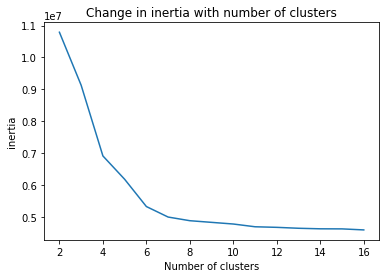

In [8]:
#Graph
inertia_l=[]
kmead_l =[]
for i in range(2,17):
    kmead = KMedoids(n_clusters=i, random_state=0).fit(numeric_data)

    inertia_l.append(kmead.inertia_)
    kmead_l.append(i)


plt.title("Change in inertia with number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.plot(kmead_l,inertia_l)
plt.show()


In [9]:
#best K  from graph is
best_K = 4
bestkmeads =KMedoids(n_clusters=best_K, random_state=0).fit(numeric_data)




In [10]:
labels =[]
labels=bestkmeads.labels_
labels

array([2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 3, 2, 3, 0, 2, 2, 2, 3, 3, 2, 1, 2,
       2, 0, 3, 2, 2, 3, 2, 2, 3, 2, 1, 0, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 3, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 1, 2, 2, 3, 3, 0, 2,
       2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 2, 2, 3, 0, 2, 2, 2, 2, 2,
       3, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2,
       2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 3, 3, 1,
       0, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 0, 2, 2, 3, 2, 2, 2, 3,
       3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2,
       2, 3, 1, 2, 2, 0, 3, 2, 2, 0, 2, 3, 2, 0, 2, 0, 2, 2, 3, 1, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 3, 3, 2, 2, 2, 2, 2,

In [11]:
data['ClusterNo'] = labels
data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,ClusterNo
0,8/28/2020,Abruzzo,Italy,4/2/2021 15:13,3725,472,2
1,8/28/2020,Acre,Brazil,4/2/2021 15:13,24462,608,3
2,8/28/2020,Adygea Republic,Russia,4/2/2021 15:13,3327,27,2
3,8/28/2020,Aguascalientes,Mexico,4/2/2021 15:13,5471,398,2
4,8/28/2020,Aichi,Japan,4/2/2021 15:13,4417,61,2
...,...,...,...,...,...,...,...
562,8/28/2020,Zaporizhia Oblast,Ukraine,4/2/2021 15:13,1487,25,2
563,8/28/2020,Zeeland,Netherlands,4/2/2021 15:13,1036,72,2
564,8/28/2020,Zhejiang,Mainland China,4/2/2021 15:13,1277,1,2
565,8/28/2020,Zhytomyr Oblast,Ukraine,4/2/2021 15:13,3063,61,2


In [12]:
def euclideanDistance(x, y):
    squared_d = 0
    for i in range(len(x)):
        squared_d += (x[i] - y[i])**2
    d = np.sqrt(squared_d)
    return d

In [13]:
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):
        
        self.medoids = []
        
        #Starting medoids will be random members from data set X
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)
        
    def isConverged(self, new_medoids):
        
        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
        
    def updateMedoids(self, X, labels):
        
        self.has_converged = True
        
        #Store data points to the current cluster they belong to
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        
        #Calculate the new medoids
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                #Cost of the current data points to be compared with the current optimal cost
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #Now we have the optimal medoid of the current cluster
            new_medoids.append(new_medoid)
        
        #If not converged yet, accept the new medoids
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def fit(self, X):
        
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            #Labels for this iteration
            cur_labels = []
            for medoid in range(0,self.k):
                #Dissimilarity cost of the current cluster
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    #Distances from a data point to each of the medoids
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclideanDistance(self.medoids[j], X[k]))
                    #Data points' label is the medoid which has minimal distance to it
                    cur_labels.append(d_list.index(min(d_list)))
                    
                    self.medoids_cost[medoid] += min(d_list)
                                
            self.updateMedoids(X, cur_labels)
            
            if self.has_converged:
                break

        return np.array(self.medoids)

        
    def predict(self,data):
         
    
        pred = []
        for i in range(len(data)):
            #Distances from a data point to each of the medoids
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclideanDistance(self.medoids[j],data[i]))
                
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

In [14]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'bo')
    plt.plot(X1[:, 0], X1[:, 1], 'go')
    plt.plot(X2[:, 0], X2[:, 1], 'ro')
    plt.plot(X3[:, 0], X3[:, 1], 'yo')

    plt.plot()
    plt.show()
    
#visualize(X, original_label)

Centers found by your model:
[[272039   8462]
 [ 18688    851]
 [  2229     65]
 [ 96636   2195]]


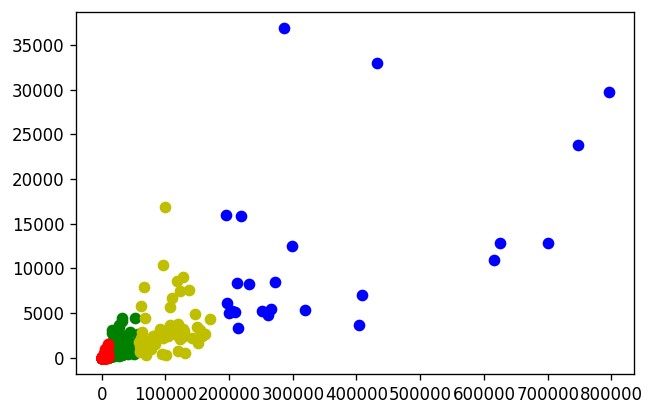

In [15]:
model=k_medoids(k=4)
print('Centers found by your model:')
print(model.fit(X))

pred = model.predict(X)

visualize(X,pred)